# Exploratory Formula 1 Data Analysis

## Driver Comparisons

Using data from 1950 to 2022, we will determine the 'greatest' driver in the history of Formula 1 by adjusting for the modern points system and difference in the number of races between seasons. 

In 2022, the winner receives 25 points, the second-place finisher 18 points, with 15, 12, 10, 8, 6, 4, 2 and 1 points for positions 3 through 10, respectively. 

In the 1950s F1 season had 7 races, compared to the 2022 season with 22 planned races. 

In [279]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [280]:
ds = pd.read_csv('driver_standings.csv',sep=',')
dn = pd.read_csv('drivers.csv',sep=',')

In [281]:
ds.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [282]:
dn.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [283]:
# Using a dictionary, allocate points according to the modern scoring system

points = [25, 18, 15, 12, 10, 8, 6, 4, 2, 1]

points_dict = {1:25, 2:18, 3:15, 4:12, 5:10, 6:8, 7:6, 8:4, 9:2, 10:1}

ds['points'] = ds['position'].map(points_dict)

ds['points'] = ds['points'].fillna(0)

In [284]:
ds.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,25.0,1,1,1
1,2,18,2,18.0,2,2,0
2,3,18,3,15.0,3,3,0
3,4,18,4,12.0,4,4,0
4,5,18,5,10.0,5,5,0


In [285]:
average_points = ds.groupby('driverId')['points'].agg(['mean']).reset_index()
average_points = average_points.sort_values(by='mean', ascending=False)

In [286]:
# Convert two columns from drivers dataframe to a dictionary

id_dict = dict(zip(dn['driverId'], dn['driverRef']))

In [287]:
average_points['name'] = average_points['driverId'].map(id_dict)

In [288]:
average_points.head(10)

,driverId,mean,name
0,1,18.828179,hamilton
571,579,17.253731,fangio
113,117,17.151961,prost
320,328,16.413462,stewart
28,30,15.619808,michael_schumacher
98,102,14.754286,senna
634,642,13.270833,farina
19,20,12.996429,vettel
365,373,12.686047,clark
639,647,12.093023,ascari


In [289]:
import matplotlib
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [290]:
names = ['Ascari','Clark','Vettel','Farina','Senna','Schumacher','Steward','Prost','Fangio','Hamilton']
points = list(average_points['mean'][0:10])
points.reverse()

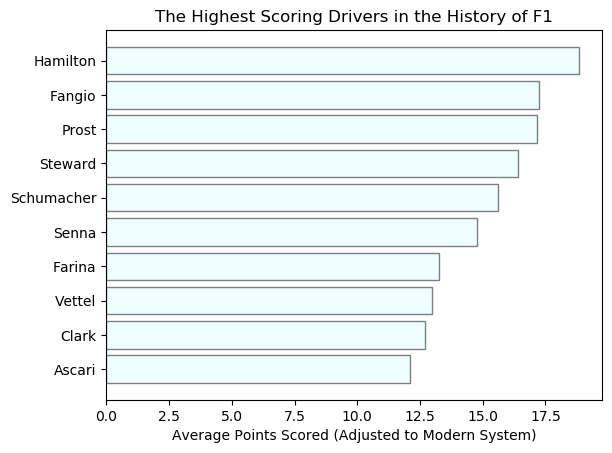

In [291]:
plt.barh(names, points, align='center', alpha=0.5, color='lightcyan', edgecolor='black')
plt.xlabel('Average Points Scored (Adjusted to Modern System)')
plt.title('The Highest Scoring Drivers in the History of F1')
plt.show()

### Does this tell the full story? 

What about the distribution of positions? We explore the finishing positions of the top ten drivers found above. 

In [292]:
points_list = []

# Remaining 102,642,20,373,647]

for i in [1,579,117,328,30]:
    temp_list = list(ds[(ds['driverId']==i)==True]['position'])
    temp_list = list(filter(lambda num: num < 20, temp_list))
    points_list.append(temp_list)

len(points_list)

5

In [293]:
names = ['Schumacher','Steward','Prost','Fangio','Hamilton']
names.reverse()

# Remaining list: 'Ascari','Clark','Vettel','Farina','Senna'

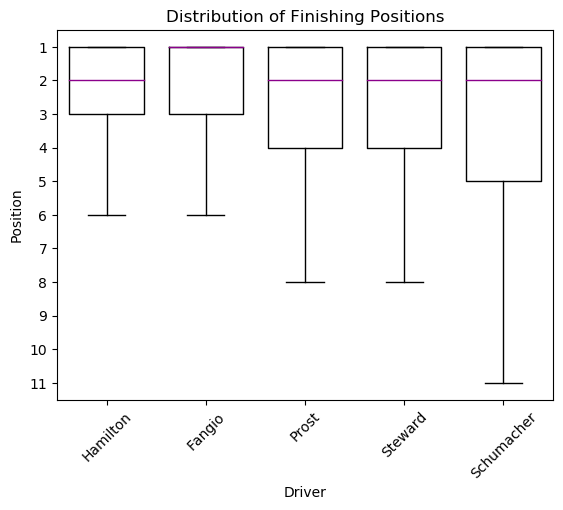

In [294]:
plt.boxplot(points_list, notch=None, vert=True, patch_artist=None, widths=0.75,
            medianprops=dict(color='darkmagenta', alpha=1), labels = names, showfliers=False)

plt.xlabel('Driver')
plt.xticks(rotation=45) 
plt.yticks(np.arange(1, 12, 1.0))
plt.ylabel('Position')
plt.title('Distribution of Finishing Positions')

ax = plt.gca()
ax.invert_yaxis()
plt.show()

In [295]:
import seaborn as sns

In [296]:
ds[(ds['driverId']==1)==True]

# Remaining: 102:1,642:1,20:1,373:1,647:1

Id_dict = {
    1:1,579:1,117:1,328:1,30:1
}

In [297]:
ds['include'] = ds['driverId'].map(Id_dict)
ds['include'] = ds['include'].fillna(0)

In [298]:
selected_drivers = ds[(ds['include']==1)==True]
selected_drivers = selected_drivers[selected_drivers["position"] <= 20 ]
selected_drivers['name'] = selected_drivers['driverId'].map(id_dict)

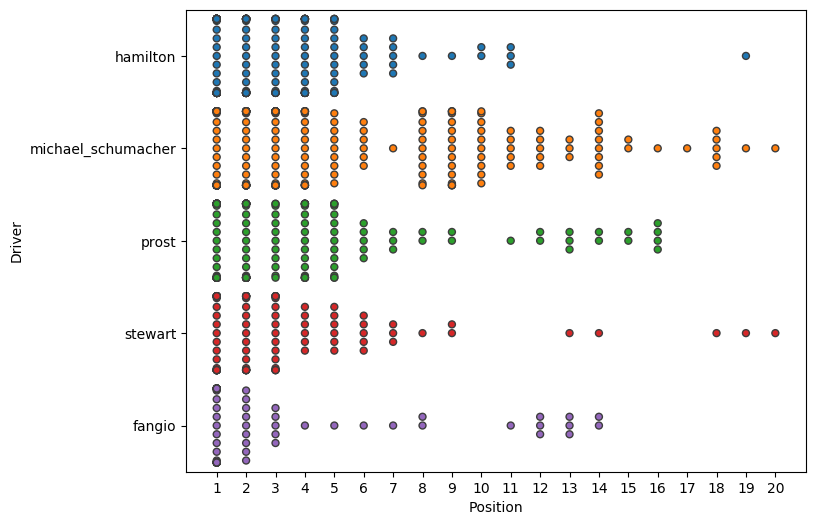

In [299]:
plt.figure(figsize=(8, 6))
ax = sns.swarmplot(data=selected_drivers, y='name', x='position', linewidth=1);
ax.set(xlabel='Position', ylabel='Driver')
plt.xticks(list(range(1,20+1)))
plt.show()